# Simple experiments

In [1]:
import matplotlib.pyplot as plt
import configparser
import argparse
import numpy as np
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import Dataset, DataLoader
import os
from time import time
from PIL import Image
import torch.utils.data
import torchvision.datasets as dset
import random
from tqdm import tqdm
from torch.nn.utils import spectral_norm
import torch.nn.functional as F

from load_data import DataGenerator, show_img
from networks import Generator, Discriminator

from utils import show_generated_img_matrix
from load_data import DataGenerator, show_img

## Load model

In [2]:
def load_state(filepath):
    return torch.load(filepath)

load_path = "logs/models/1250.torch"
checkpoint = load_state(load_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netG = Generator(128, 32, 3).to(device)
netG.load_state_dict(checkpoint['netG_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Show generated images

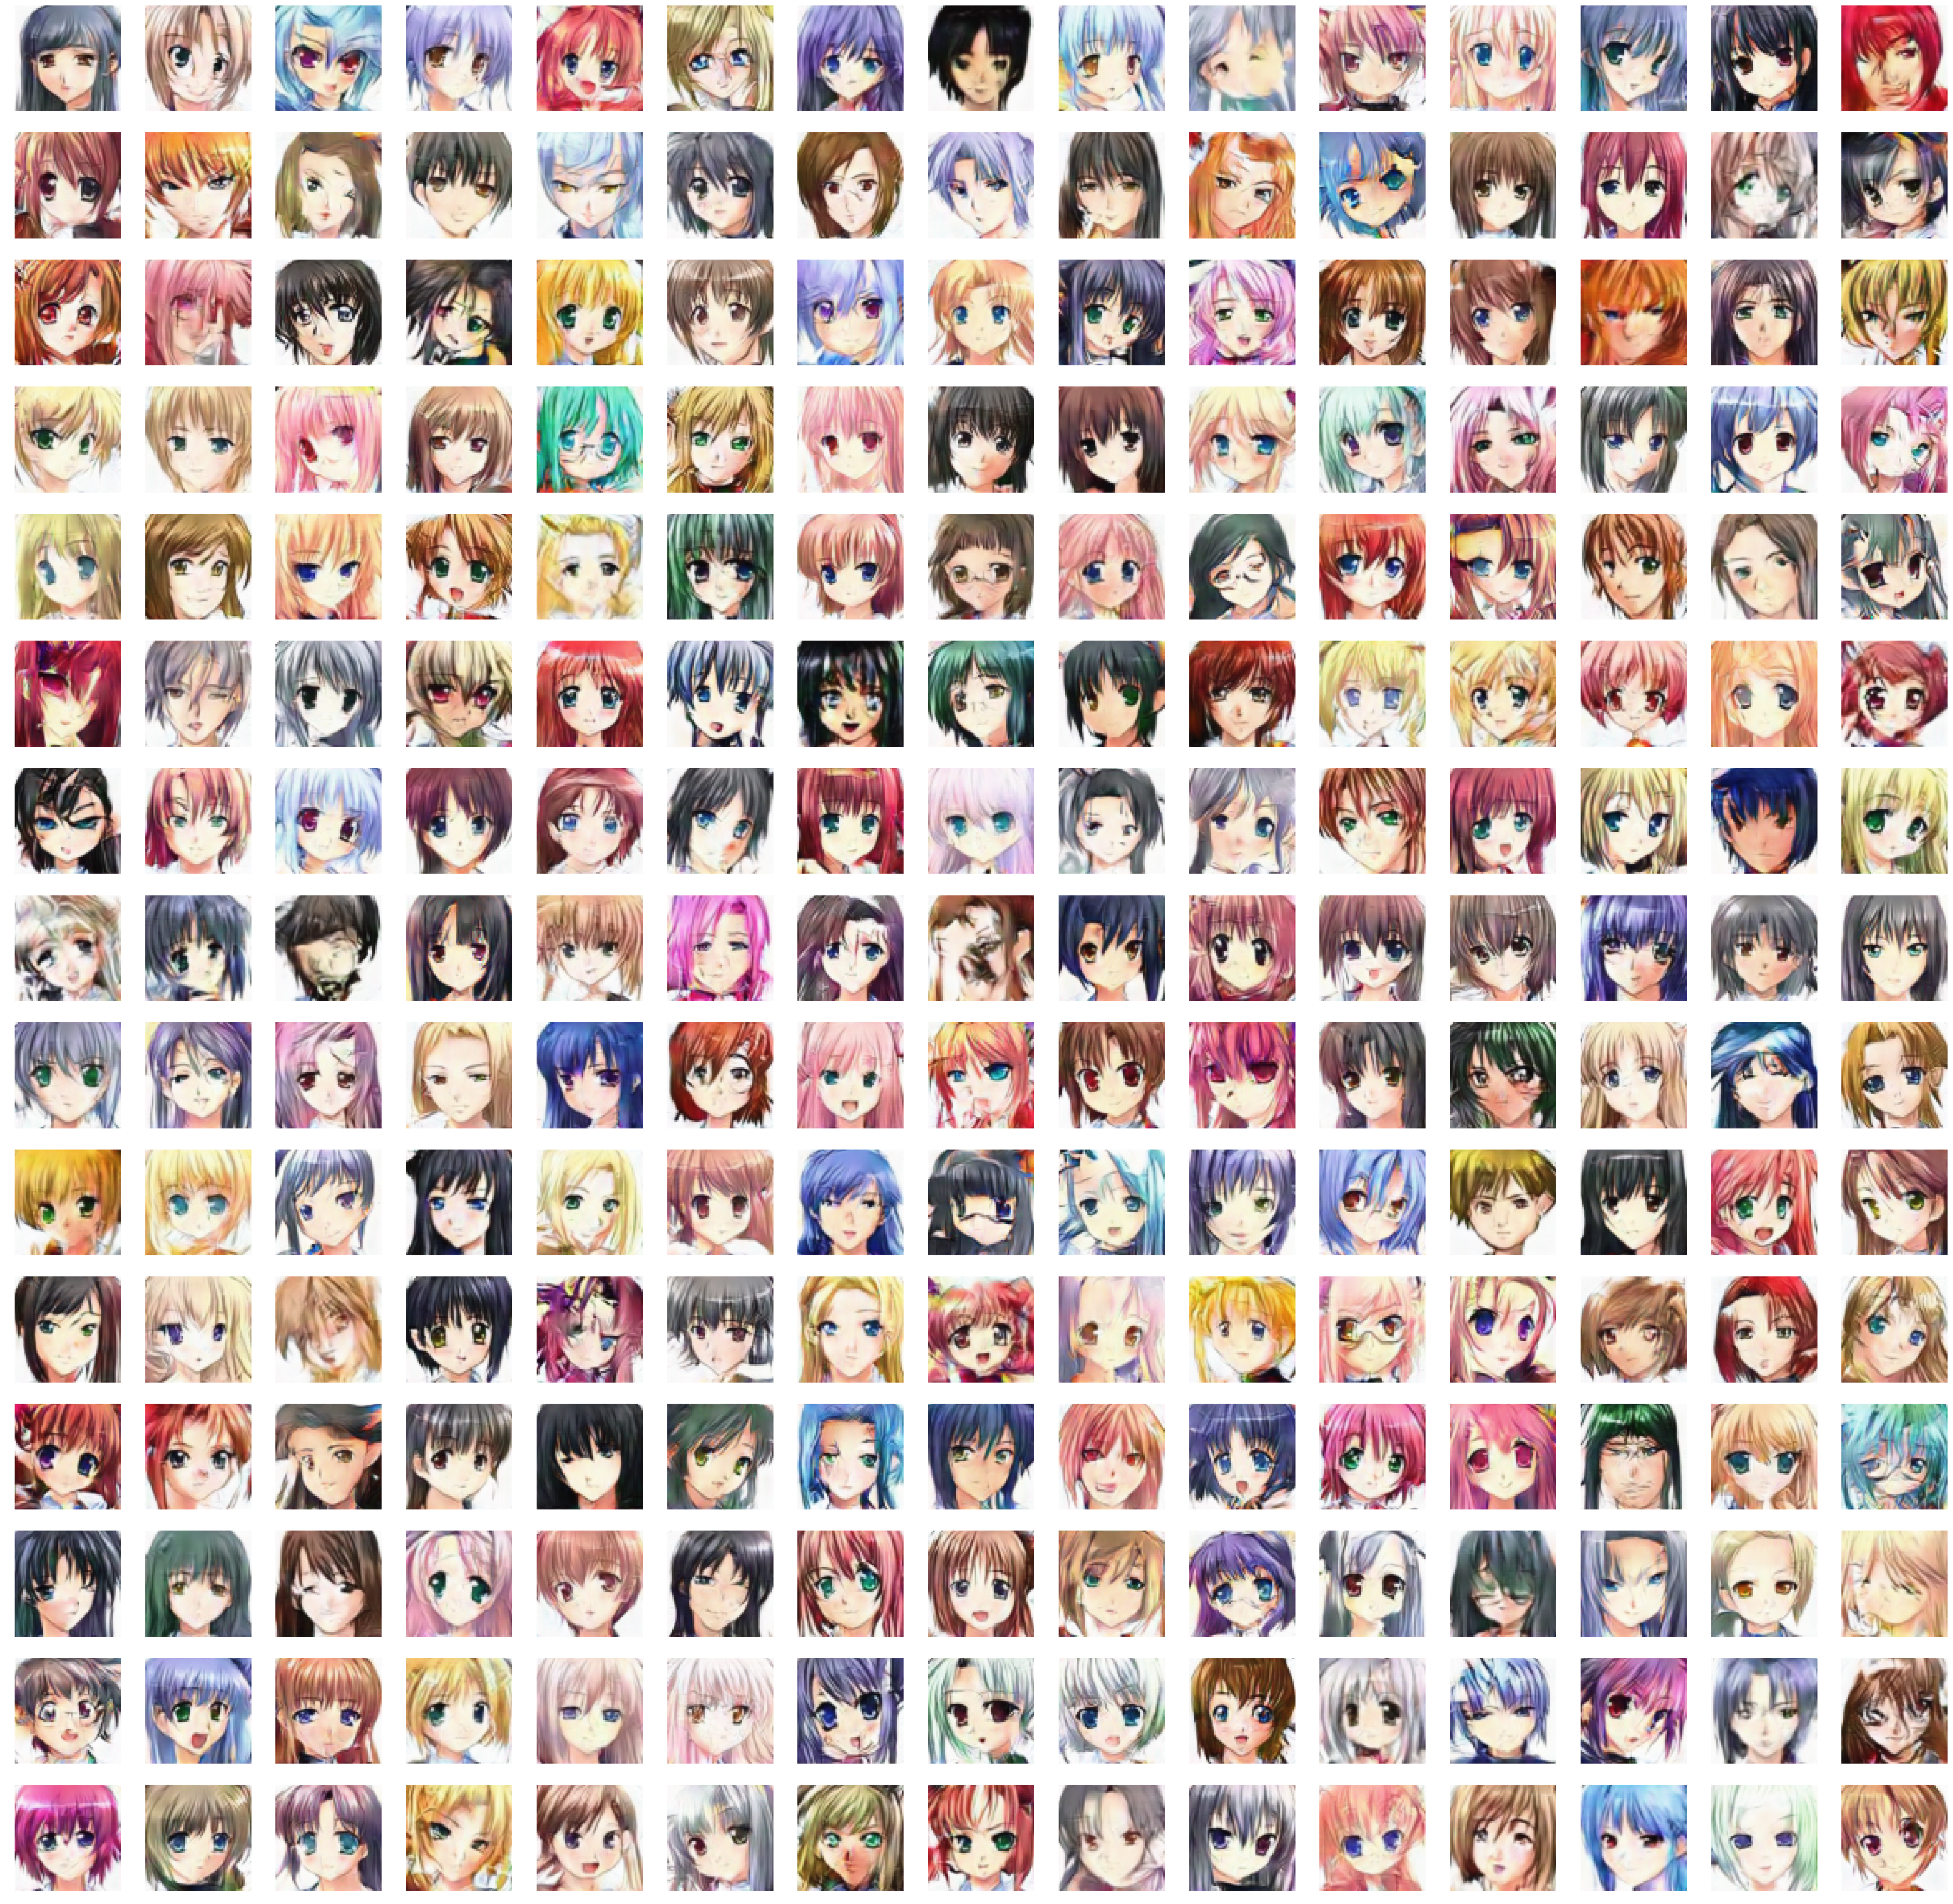

In [3]:
show_generated_img_matrix(netG, (15, 15))

# GAN-Walk

In [4]:
from PIL import Image, ImageDraw
from IPython.display import Image as IMG 

Walk in Latent Space - IMAGE  0  = gif 0


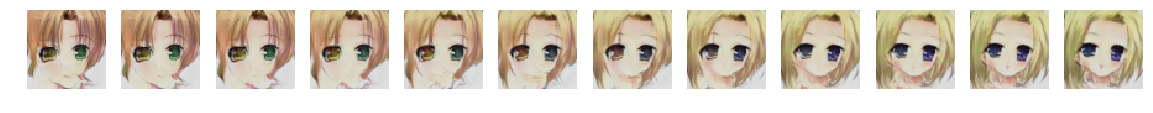

Walk in Latent Space - IMAGE  1  = gif 1


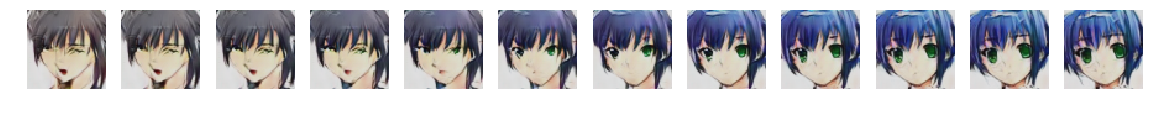

Walk in Latent Space - IMAGE  2  = gif 2


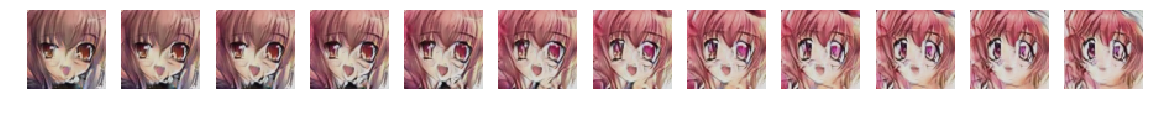

Walk in Latent Space - IMAGE  3  = gif 3


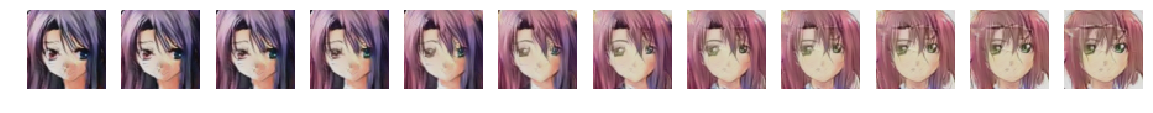

Walk in Latent Space - IMAGE  4  = gif 4


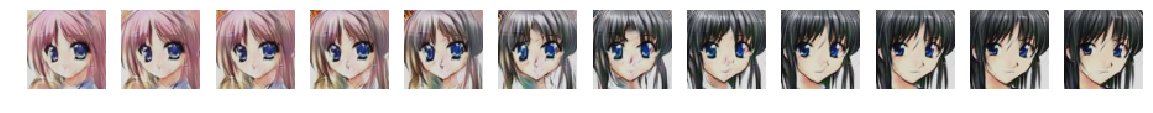

Walk in Latent Space - IMAGE  5  = gif 5


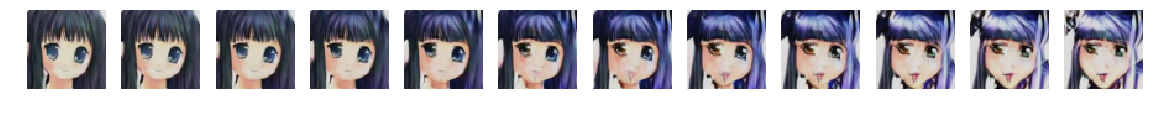

Walk in Latent Space - IMAGE  6  = gif 6


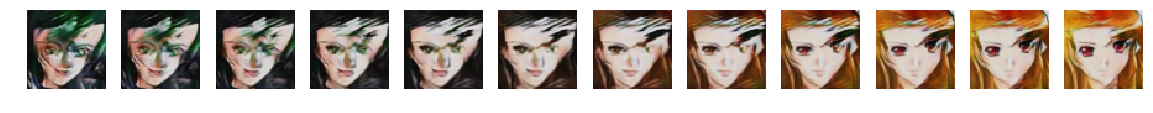

Walk in Latent Space - IMAGE  7  = gif 7


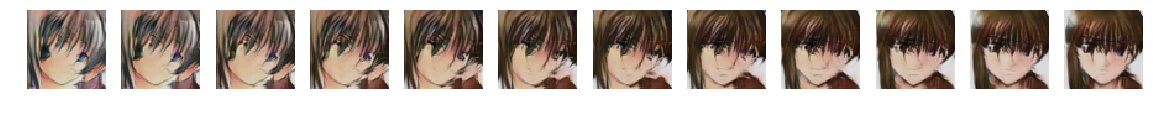

Walk in Latent Space - IMAGE  8  = gif 8


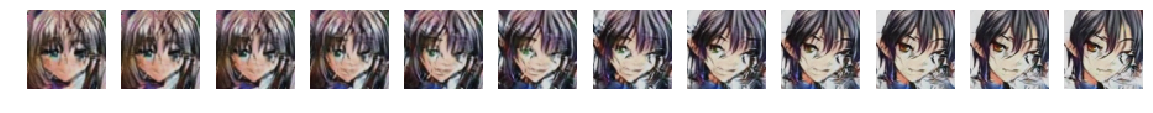

Walk in Latent Space - IMAGE  9  = gif 9


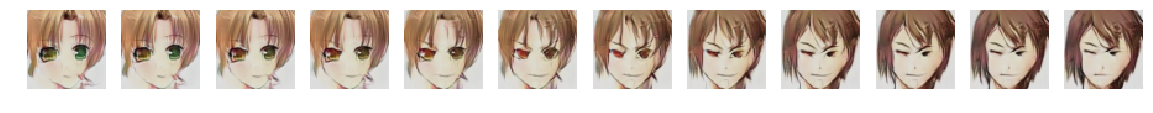

In [15]:
# Thanks to Nanashi - https://www.kaggle.com/jesucristo/animation-gan-latent-walk

gifs = []
steps = 12
nz = 128
for k in range(10): 
    a = np.random.randint(nz)
    b = np.random.randint(nz)
    print('Walk in Latent Space - IMAGE ',k, ' = gif',k)
    frames = []
    plt.figure(figsize=(20,3))
    for j in range(steps*2):
        xx = np.zeros((nz))
        theta = j%steps/(steps-1)
        if j>=steps: 
            theta = 1-j%steps/(steps-1)
        xx[a] = theta 
        xx[b] = 1-theta
        xx = xx/(np.sqrt(xx.dot(xx.T)))
        z  = torch.Tensor(xx.reshape(-1, nz, 1, 1)).to(device)
        img = netG(z).to("cpu").clone().detach().squeeze(0).numpy().transpose(1, 2, 0)
        img = (img + 1.) / 2.
        img = Image.fromarray((225*img).astype('uint8'))
        frames.append(img)
        if j < steps: 
            plt.subplot(1,steps,j+1)
            plt.axis('off')
            plt.imshow(img)
    plt.show()
    gifs.append(frames)

## Make GIFs

In [16]:
for index, gif in enumerate(gifs):
    frames = gif
    frames[0].save('images/latent_walk/girl_'+str(index)+'.gif', format='GIF', append_images=frames[1:], save_all=True, duration=150, loop=0)

## Display GIFs

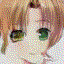

In [17]:
IMG(filename='images/latent_walk/girl_0.gif', width=64, height = 64)

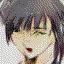

In [18]:
IMG(filename='images/latent_walk/girl_1.gif', width=64, height = 64)

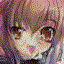

In [19]:
IMG(filename='images/latent_walk/girl_2.gif', width=64, height = 64)

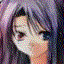

In [20]:
IMG(filename='images/latent_walk/girl_3.gif', width=64, height = 64)

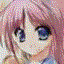

In [21]:
IMG(filename='images/latent_walk/girl_4.gif', width=64, height = 64)

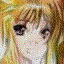

In [12]:
IMG(filename='images/latent_walk/girl_5.gif', width=64, height = 64)